# NYC Complaint Data Analysis


The people of New Yorker use the 311 system to report complaints about the non-emergency problems to local authorities. Various agencies in NY are assigned these problems. The Department of Housing Preservation and Development of New York City is the agency that processes 311 compliants that are related to housing and buildins. 

In the last few years, the number of 311 complaints coming to the Department of Housing Preservation and Development has increased significantly. Although these complaints are not necessarily urgent, the large volume of complaints and the sudden increase is impacting the overall efficiency of operations of the agency.

Therefore, a solution is presented here to help the Department of Housing Preservation and Development to manage their large volume of 311 complaints they are receiving every year.

The agency needs severals questions, which are answered below:

### 1. Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

To address our first problem, we first need to do some preparations and explatory data analysis.

##### Preparations

Let's make sure the SODA package for Python is installed and import all necassery packages, libraries and load the files needed for our EDA:

In [1]:
! pip install sodapy
from sodapy import Socrata

# linear algebra
import numpy as np
# data processing
import pandas as pd
# scientific computing and technical computing
import scipy
# statistical data visualization
import seaborn as sns
# Matplotlib is a Python 2D plotting library
import matplotlib.pyplot as plt
%matplotlib inline
# to make HTTP requests such as to use GET method
import requests
# to use a single, clean Python 3.x-compatible codebase to support both Python 2 
import future

In [2]:
# Set up Socrata domain/identifier for NYC 311
domain = "data.cityofnewyork.us" 
dataset_id = "erm2-nwe9"

# Unauthenticated client only works with public data sets. 
# Note 'None' in place of application token, and no username or password:
client = Socrata(domain,None)

NYC311 = client.get_metadata(dataset_id)
[x['name'] for x in NYC311['columns']]

['Unique Key',
 'Created Date',
 'Closed Date',
 'Agency',
 'Agency Name',
 'Complaint Type',
 'Descriptor',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'Cross Street 1',
 'Cross Street 2',
 'Intersection Street 1',
 'Intersection Street 2',
 'Address Type',
 'City',
 'Landmark',
 'Facility Type',
 'Status',
 'Due Date',
 'Resolution Description',
 'Resolution Action Updated Date',
 'Community Board',
 'BBL',
 'Borough',
 'X Coordinate (State Plane)',
 'Y Coordinate (State Plane)',
 'Open Data Channel Type',
 'Park Facility Name',
 'Park Borough',
 'Vehicle Type',
 'Taxi Company Borough',
 'Taxi Pick Up Location',
 'Bridge Highway Name',
 'Bridge Highway Direction',
 'Road Ramp',
 'Bridge Highway Segment',
 'Latitude',
 'Longitude',
 'Location',
 'Zip Codes',
 'Community Districts',
 'Borough Boundaries',
 'City Council Districts',
 'Police Precincts']

Since we are interested in just for Department of Housing Preservation and Development, let’s create an inquiry only for this agency by using simple filtering such as Agency=HPD. Also, when we look at the name of all columns, we can figure out that we do not need to use all 41 columns for this study. Therefore, it is better to use $select parameter that is similar to a SELECT in SQL. We will be interested in the columns that are Unique Key, Created Date, Closed Date, Complaint Type, Location Type, Incident Zip, Incident Address, Street Name, Address Type, City, Status, Resolution Description, Borough, Latitude, Longitude, Location.

In [3]:
# Select rows, date range, conditional column value, and maximum case limit.
selected_columns = """
    unique_key, 
    created_date,
    closed_date,
    complaint_type,
    location_type,
    incident_zip, 
    incident_address,
    street_name, 
    address_type,
    city,  
    status,
    resolution_description,
    borough,
    latitude,
    longitude,
    location
"""

# Define data request with query
HPD = client.get(dataset_id, Agency = "HPD", select=selected_columns, order = "unique_key", limit = 10000000)

# Convert to Pandas dataframe and print head
HPD_df = pd.DataFrame.from_records(HPD)

Calling the data from the web is taking too much time. Therefore, it is  more efficient to save it in a csv format.

In [4]:
HPD_df.to_csv("HPD_df.csv")

In [5]:
# Read csv data
HPD_df = pd.read_csv('HPD_df.csv', parse_dates = ['created_date', 'closed_date'])

In [6]:
# Print the columns name
HPD_df.columns

Index(['Unnamed: 0', 'unique_key', 'created_date', 'closed_date',
       'complaint_type', 'location_type', 'incident_zip', 'incident_address',
       'street_name', 'address_type', 'city', 'status',
       'resolution_description', 'borough', 'latitude', 'longitude',
       'location'],
      dtype='object')

In [7]:
# Print the first 5 row of data
HPD_df.head(5)

,Unnamed: 0,unique_key,created_date,closed_date,complaint_type,location_type,incident_zip,incident_address,street_name,address_type,city,status,resolution_description,borough,latitude,longitude,location
0,0,15629728,2010-01-01,2010-01-12,HEATING,RESIDENTIAL BUILDING,11210.0,3101 FOSTER AVENUE,FOSTER AVENUE,ADDRESS,BROOKLYN,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.638696,-73.946969,"{'latitude': '40.6386960194481', 'longitude': ..."
1,1,15629899,2010-01-01,2010-01-16,PLUMBING,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,29 STREET,ADDRESS,ASTORIA,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.764035,-73.925935,"{'latitude': '40.76403512691401', 'longitude':..."
2,2,15630099,2010-01-01,2010-01-01,HEATING,RESIDENTIAL BUILDING,10466.0,1405 EAST 233 STREET,EAST 233 STREET,ADDRESS,BRONX,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.888997,-73.836192,"{'latitude': '40.88899738452758', 'longitude':..."
3,3,15630315,2010-01-01,2010-01-16,PLUMBING,RESIDENTIAL BUILDING,11106.0,31-54 29 STREET,29 STREET,ADDRESS,ASTORIA,Closed,The Department of Housing Preservation and Dev...,Unspecified,40.764035,-73.925935,"{'latitude': '40.76403512691401', 'longitude':..."
4,4,15630431,2010-01-01,2010-01-02,HEATING,RESIDENTIAL BUILDING,11226.0,22 MARTENSE STREET,MARTENSE STREET,ADDRESS,BROOKLYN,Closed,More than one complaint was received for this ...,Unspecified,40.651236,-73.958293,"{'latitude': '40.65123611619841', 'longitude':..."


In [8]:
# Print number of rows and columns (dataframe shape)
HPD_df.shape

(6041299, 17)

In [9]:
# To get a concise summary of the dataframe
HPD_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6041299 entries, 0 to 6041298
Data columns (total 17 columns):
Unnamed: 0                int64
unique_key                int64
created_date              datetime64[ns]
closed_date               datetime64[ns]
complaint_type            object
location_type             object
incident_zip              float64
incident_address          object
street_name               object
address_type              object
city                      object
status                    object
resolution_description    object
borough                   object
latitude                  float64
longitude                 float64
location                  object
dtypes: datetime64[ns](2), float64(3), int64(2), object(10)
memory usage: 783.6+ MB



The dataset has 6036282 examples and 17 columns. 10 of the columns are objects, 2 are integers, 3 are floats, and 2 are datetimes.

It is also better to check missing data, so let's get nan values in the dataset and their percentage of the each column:

In [10]:
#To get nan values in the entire dataset
HPD_df.isnull().sum()

Unnamed: 0                     0
unique_key                     0
created_date                   0
closed_date               125878
complaint_type                 0
location_type              52830
incident_zip               80708
incident_address           52831
street_name                52831
address_type               84771
city                       80284
status                         0
resolution_description      7823
borough                        0
latitude                   80682
longitude                  80682
location                   80682
dtype: int64

In [11]:
#missing data
total = HPD_df.isnull().sum().sort_values(ascending=False)
percent = (HPD_df.isnull().sum()/HPD_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
closed_date,125878,0.020836
address_type,84771,0.014032
incident_zip,80708,0.013359
location,80682,0.013355
longitude,80682,0.013355
latitude,80682,0.013355
city,80284,0.013289
incident_address,52831,0.008745
street_name,52831,0.008745
location_type,52830,0.008745


This result shows that we do not have big amount missing value column. If some necessary change requires for future analysis we can do it later. Therefore, we can prefer to keep the columns as they are.

In [12]:
HPD_df['complaint_type'].unique()

array(['HEATING', 'PLUMBING', 'HPD Literature Request', 'PAINT - PLASTER',
       'GENERAL CONSTRUCTION', 'NONCONST', 'CONSTRUCTION', 'ELECTRIC',
       'APPLIANCE', 'PAINT/PLASTER', 'GENERAL', 'STRUCTURAL', 'SAFETY',
       'UNSANITARY CONDITION', 'WATER LEAK', 'DOOR/WINDOW',
       'FLOORING/STAIRS', 'HEAT/HOT WATER', 'OUTSIDE BUILDING',
       'ELEVATOR', 'VACANT APARTMENT', 'AGENCY', 'Unsanitary Condition',
       'General', 'Safety', 'Outside Building', 'Plumbing', 'Appliance',
       'Electric', 'Mold'], dtype=object)

To find the most frequent complaints, let's use value_counts() as the following:

In [13]:
complaint_type = HPD_df['complaint_type'].value_counts()
complaint_type = complaint_type.sort_values(ascending=False)
complaint_type

HEAT/HOT WATER            1275996
HEATING                    887869
PLUMBING                   712114
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       453507
PAINT - PLASTER            361257
PAINT/PLASTER              347055
ELECTRIC                   307803
NONCONST                   260890
DOOR/WINDOW                206017
WATER LEAK                 194326
GENERAL                    151910
FLOORING/STAIRS            137680
APPLIANCE                  113286
HPD Literature Request      52830
SAFETY                      51760
OUTSIDE BUILDING             7157
ELEVATOR                     6759
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold          

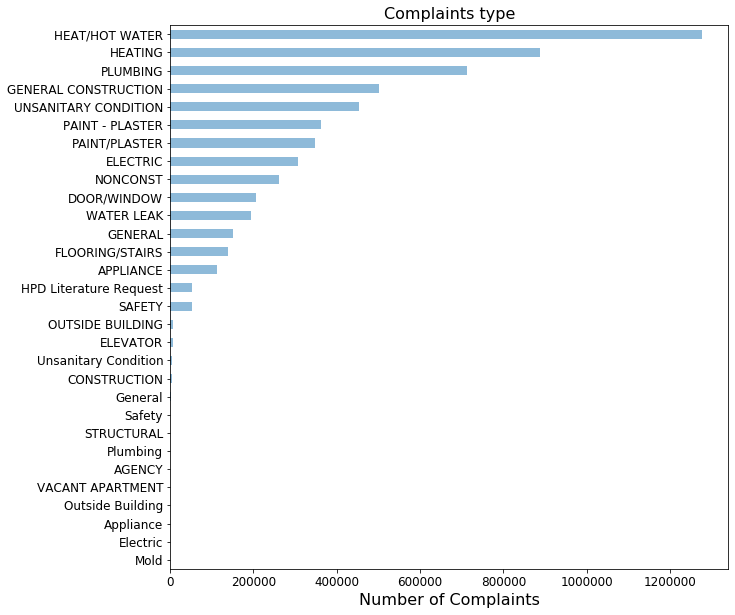

In [14]:
complaint_type.sort_values()
complaint_type.plot(kind='barh',alpha=0.5,figsize=(10,10),fontsize=12)
plt.gca().invert_yaxis()
plt.xlabel('Number of Complaints', fontsize=16)
plt.title('Complaints type', fontsize=16)
plt.show()

From the bar graph and the previous cell, we can easily see that **Heat/Hot Water is severe problem in the Department of HPD.**

Let's also do a further analysis to see how these complaints are changing based on the created year and month. To do so, we need to split month and year value from the created_date column. The following cell shows creating new columns for complaint year and month:

In [15]:
HPD_df['complaint_year'] = HPD_df['created_date'].dt.year
HPD_df['complaint_month'] = HPD_df['created_date'].dt.month

In [16]:
complaint_year_type = HPD_df.groupby("complaint_year")["complaint_type"].value_counts()
complaint_year_type

complaint_year  complaint_type      
2010            HEATING                 214218
                GENERAL CONSTRUCTION    127131
                PLUMBING                111504
                PAINT - PLASTER          93194
                NONCONST                 69659
                                         ...  
2020            APPLIANCE                 1154
                FLOORING/STAIRS            719
                SAFETY                     552
                ELEVATOR                    92
                OUTSIDE BUILDING            46
Name: complaint_type, Length: 163, dtype: int64

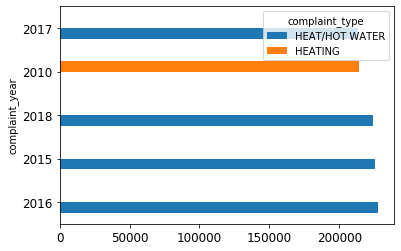

In [17]:
HPD_df.groupby('complaint_year').complaint_type.value_counts().nlargest(5).unstack().plot.barh(fontsize=12)

HEAT/HOT WATER complaint column has been merged with HEATING after 2014 if we read the New York City 311 data file. Also, the bar plot above proofs this. Let’s also see monthly occurred severe complaint type as following. 

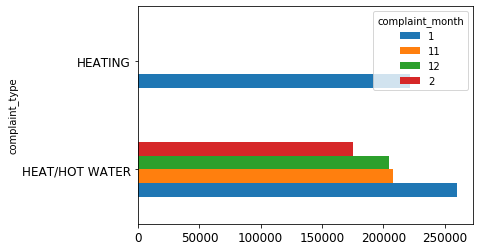

In [18]:
HPD_df.groupby('complaint_type').complaint_month.value_counts().nlargest(5).unstack().plot.barh(fontsize=12)

This is also **another proof that complaint type heating / heat-hot water occurs during the cold weather.**

##### Conclusion for Question 1: 

**HEAT/HOT water complaint has the maximum number of complaints from the category. Therefore, HPD’s priority should be the HEAT/HOT WATER complaint. They have specifically focussed on the winter season for this problem.**